In [1]:
from drought.visualization import plot
from drought.data import pipeline
import matplotlib.pyplot as plt
import pandas as pd
from drought.data.aggregator import get_monthly_means_and_shot_count
import drought.data.df_extensions as dfext
import drought.data.interpolate as interpolate
import seaborn as sns

### Get all GEDI Footprints for 8 polygons

In [2]:
footprints = pipeline.get_gedi_footprints()

### GEDI Availability

In [3]:
monthly = get_monthly_means_and_shot_count(footprints, columns=['pai', 'rh100'])

In [4]:
monthly = interpolate.fill_timeseries_missing_data(monthly, 
                                                   start_date='04-2019', 
                                                   end_date='07-2022', 
                                                   values_to_fill={'number': 0})

The resulting df needs to be sorted by year and month so that the x axis of the chart will show months in the correct order. Additionally, year and month columns are converted to proper datetime objects. 

In [5]:
monthly= dfext.add_date_column(monthly)

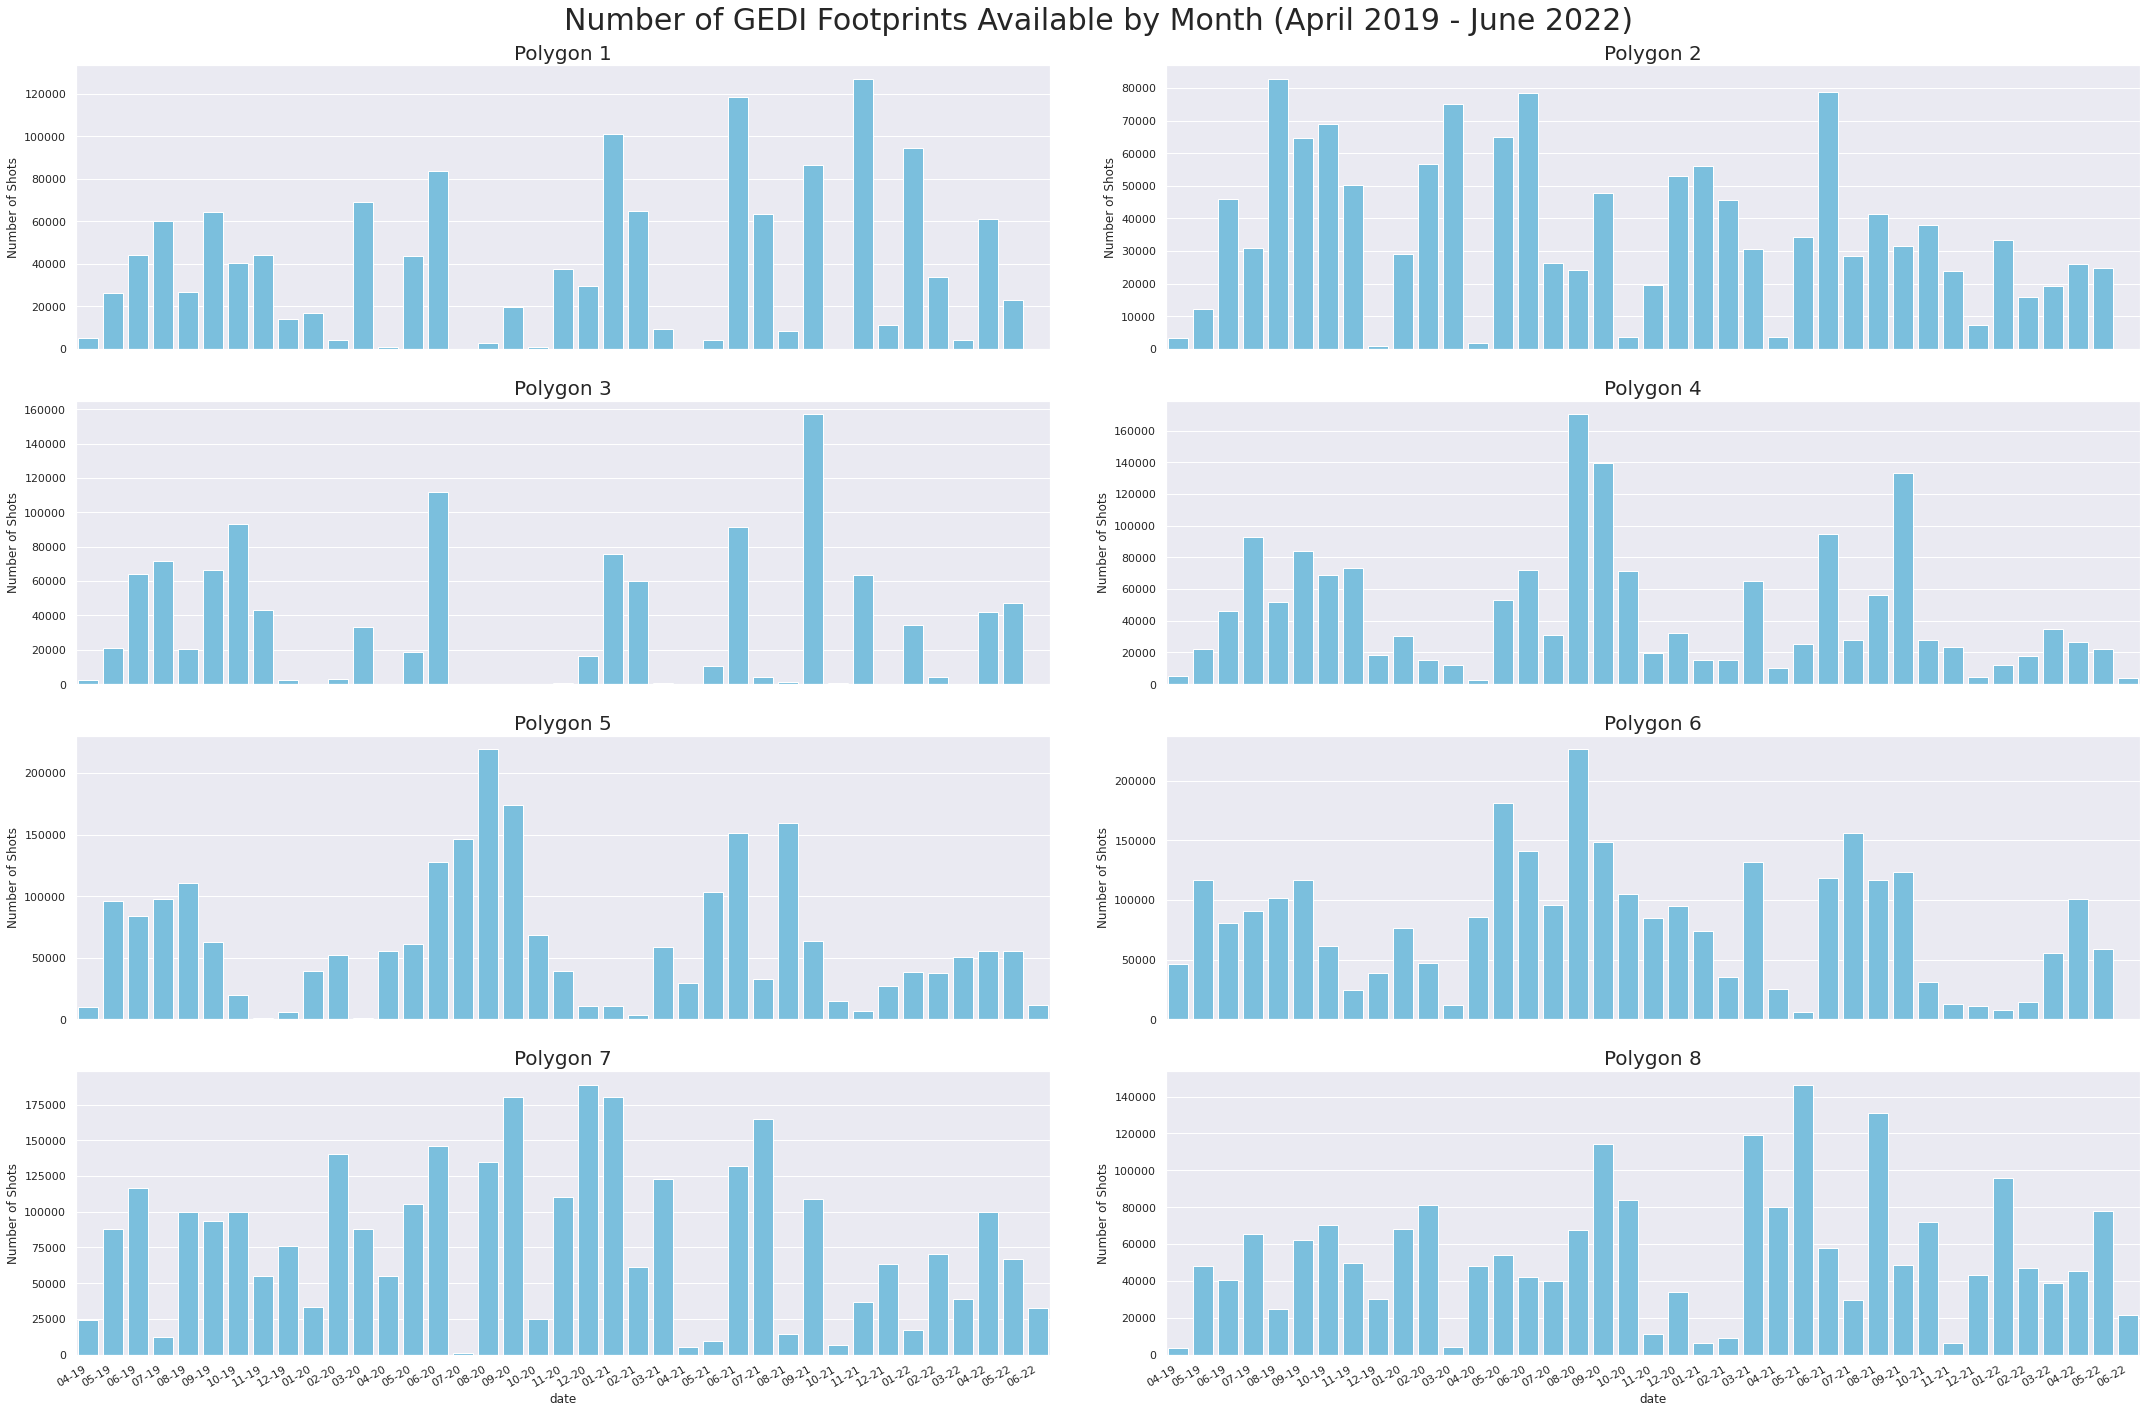

In [6]:
fig, ax = plot.barplot_per_polygon(monthly, 
                                   x='date',
                                   y='number',
                                   ylabel ='Number of Shots',
                                   title="Number of GEDI Footprints Available by Month (April 2019 - June 2022)") # noqa: E501

fig.autofmt_xdate()

In the plot below, we plot the number of GEDI shots for that month vs. the mean PAI value for the month. If there are no GEDI shots for the entire month, we will have missing PAI data. We can see in the plot the missing data where the orange line has the breaks in.

Polygon 3 misses a lot of months in 2020, and Polygon 1 is missing 2 months in total. The rest of the polygons have non-zero shots for each month.

We can note as well that value of PAI in some months is out of line with the PAI values in the adjacent months. These usually correlate with months in which we have fewer GEDI shots. Some obvious outliers are:
* Polygon 1
  *  10-2020
* Polygon 2
  * 04-2019
  * 12-2019
  * 04-2020
* Polygon 3 - many, and much data is missing
* Polygon 4
  * 04-2020
  * 06-2022
* Polygon 5
  * 11-2019
  * 03-2020
* Polygon 6
  * 06-2022
* Polygon 7
  * 07-2020
  * 05-2021
* Polygon 8
  * 03-2020
  * 01-2021
  

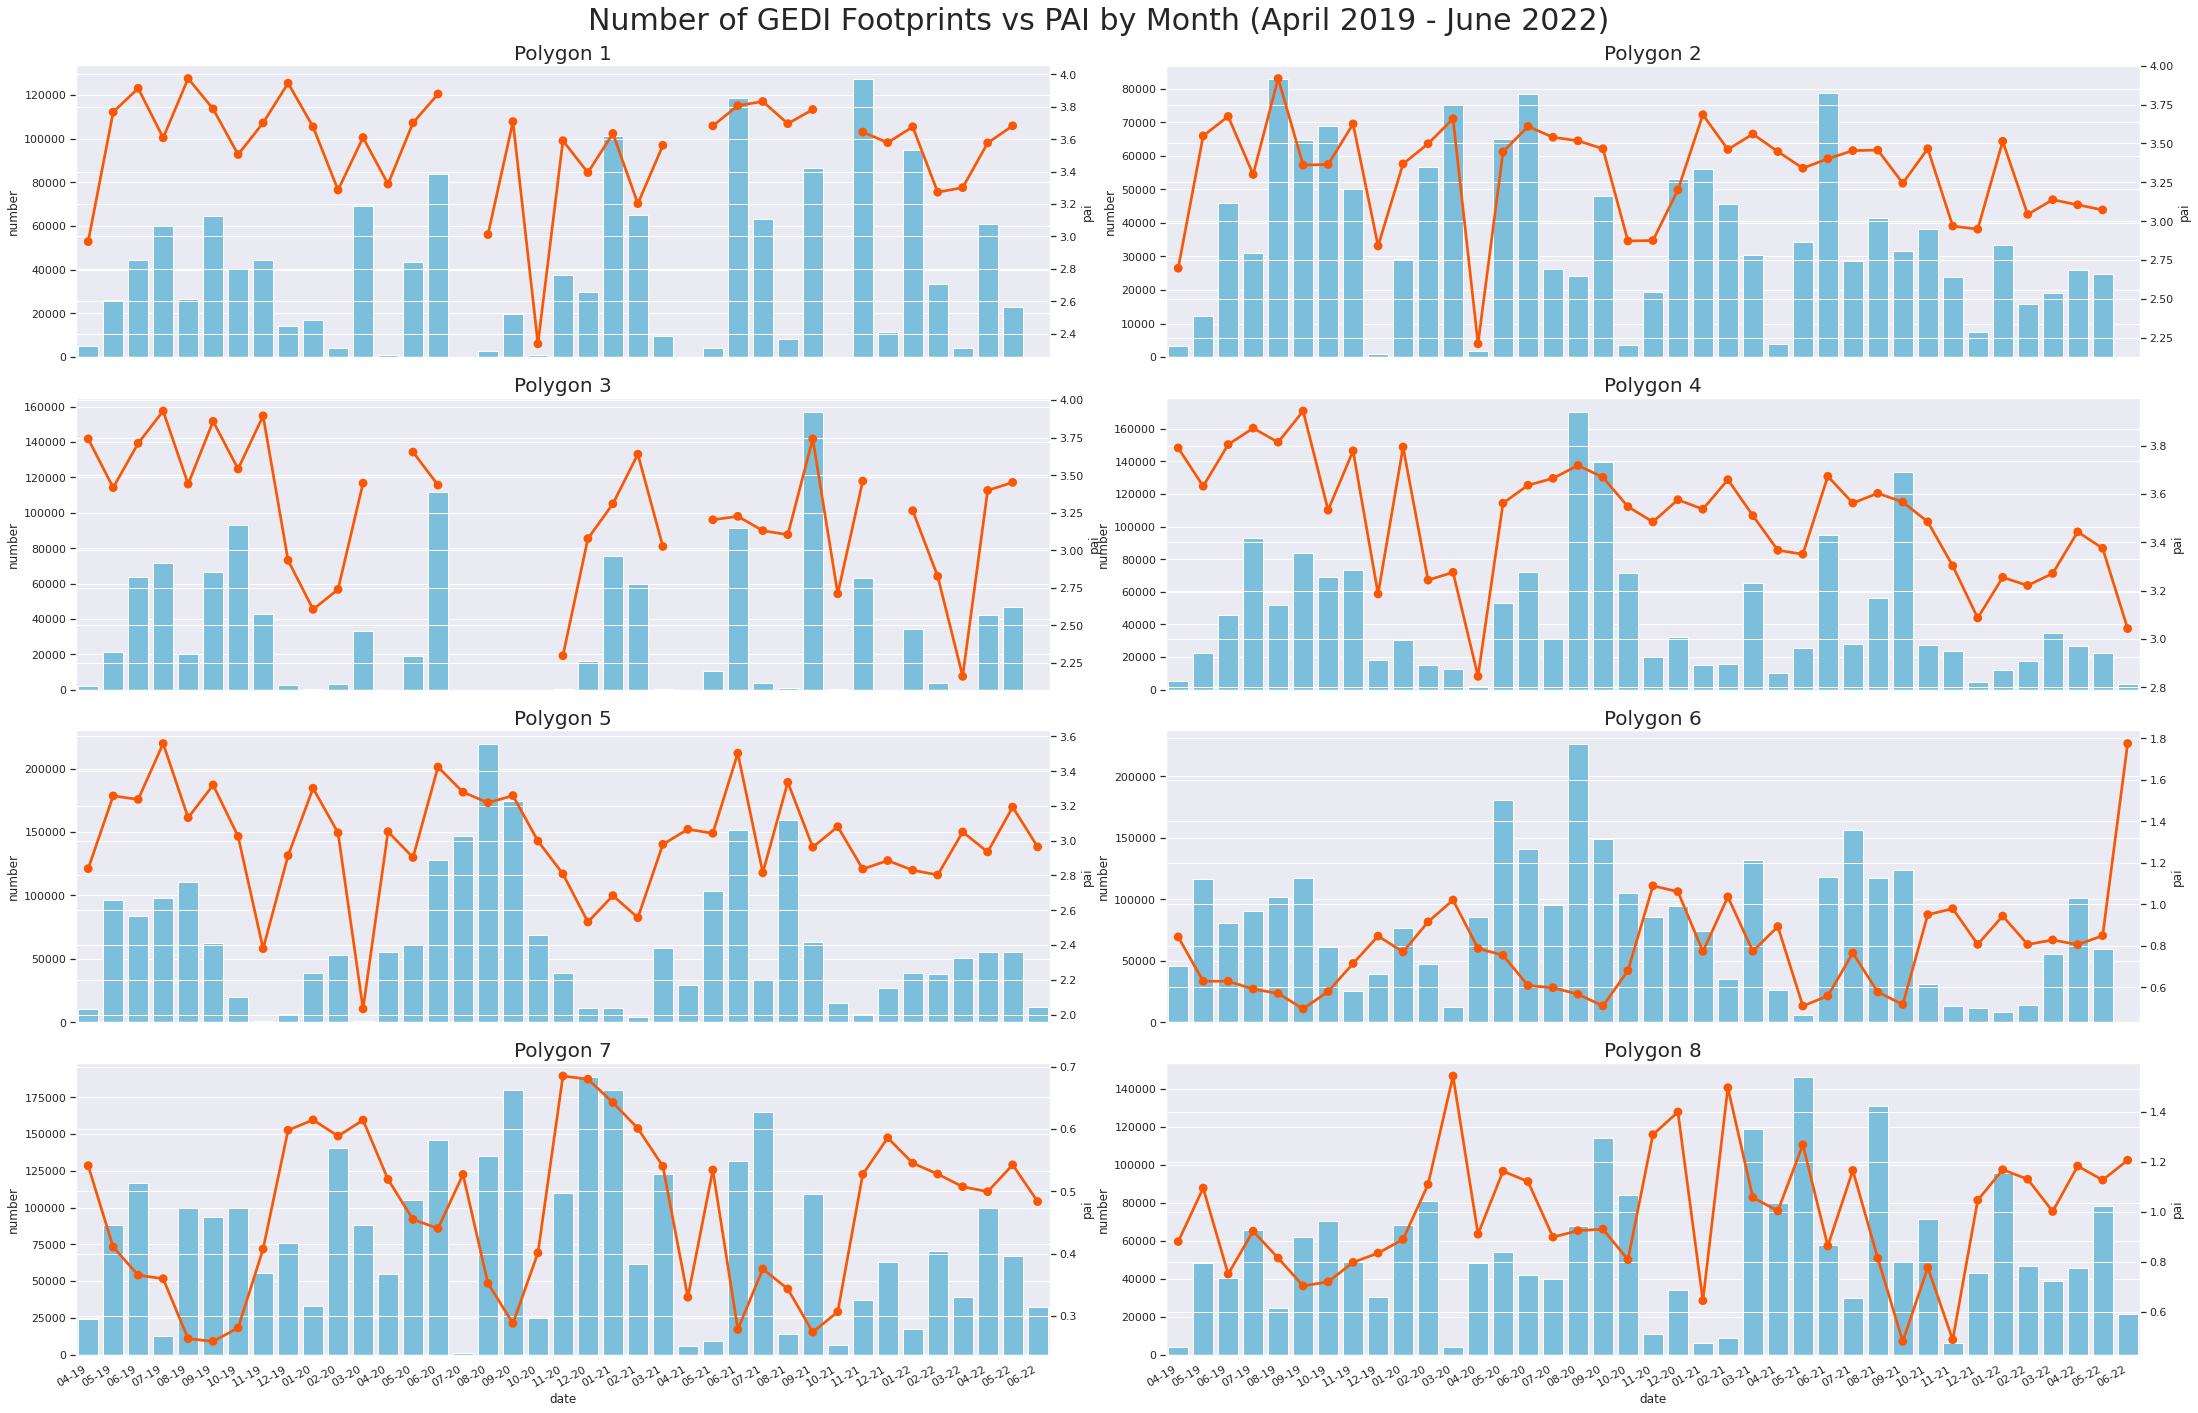

In [7]:
fig, ax = plot.layered_plot_per_polygon(monthly, 
                                        x='date',
                                        bar_y='number',
                                        line_y='pai',
                                        title="Number of GEDI Footprints vs PAI by Month (April 2019 - June 2022)") # noqa: E501

fig.autofmt_xdate()

### Plot Individual months

In [8]:
def plot_one_month_data(df, polygon_id, month, year, x_lim_max=6):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'Footprints for polygon {polygon_id}. Date: {month}-{year}', fontsize=20)
    one_month_data = df.loc[(df.polygon_id == polygon_id)&(df.month==month)&(df.year==year)]
    sns.scatterplot(x=one_month_data.lon_lowestmode, y=one_month_data.lat_lowestmode, ax=ax[0])
    sns.histplot(one_month_data.pai, ax=ax[1])
    ax[1].set_xlim(0,x_lim_max)
    plt.axvline(one_month_data.pai.mean(), c='red', ls='-', lw=2.5)
    plt.axvline(one_month_data.pai.median(), c='orange', ls='--', lw=2.5)
    plt.show()
    return one_month_data

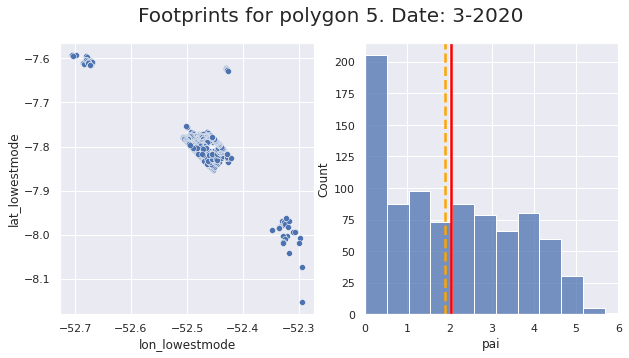

In [9]:
data = plot_one_month_data(footprints, 5, 3, 2020)

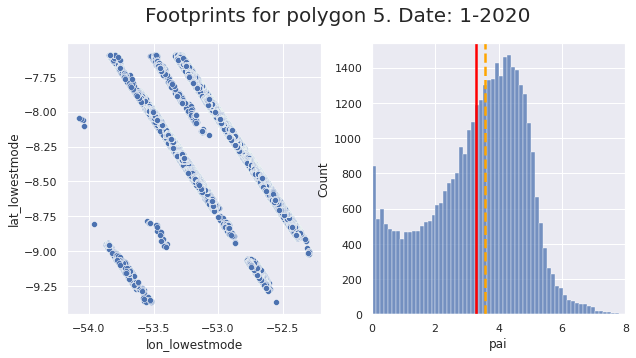

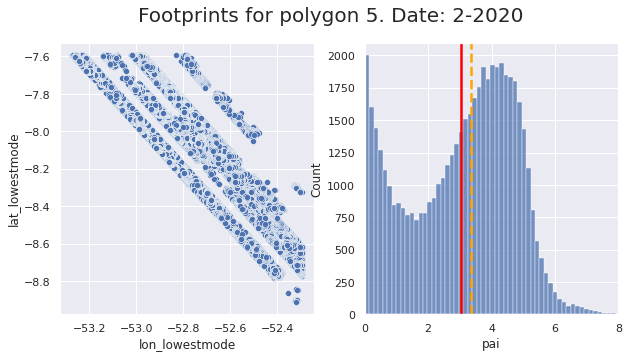

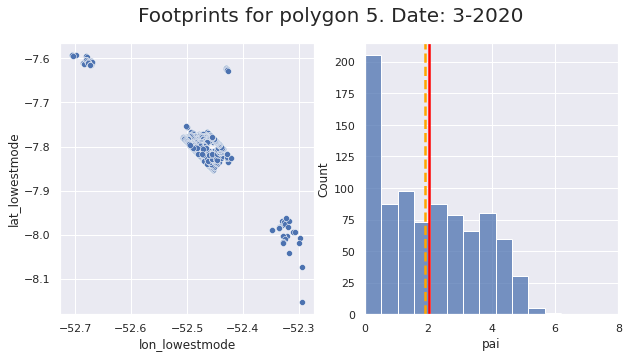

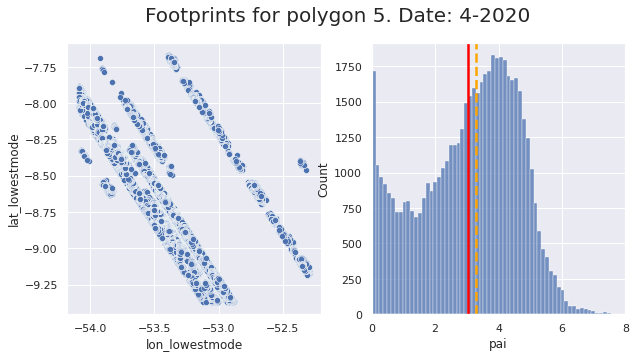

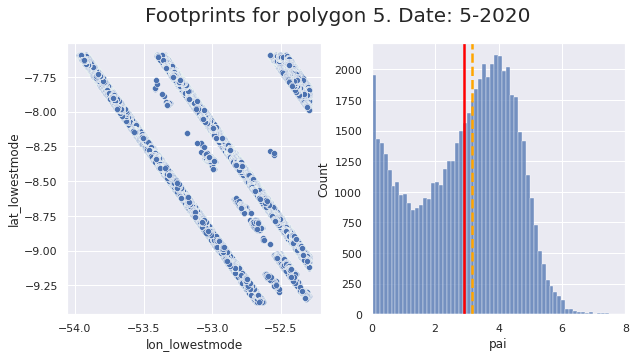

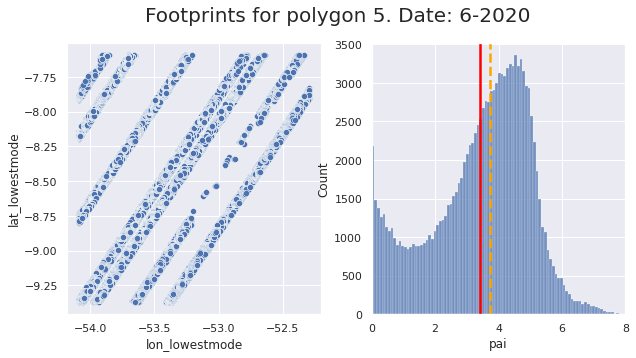

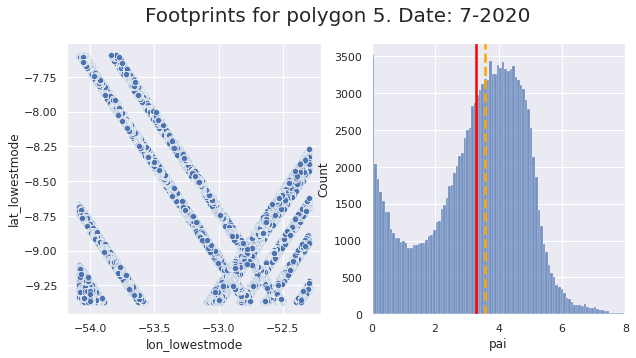

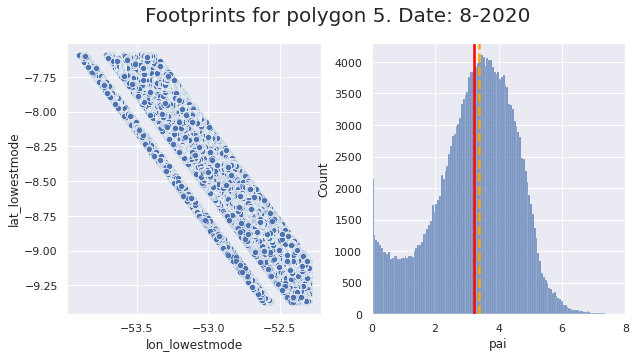

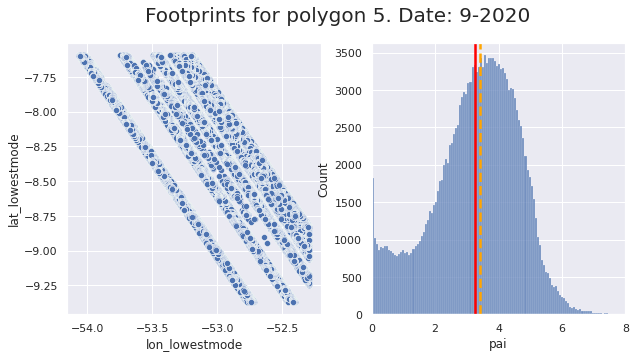

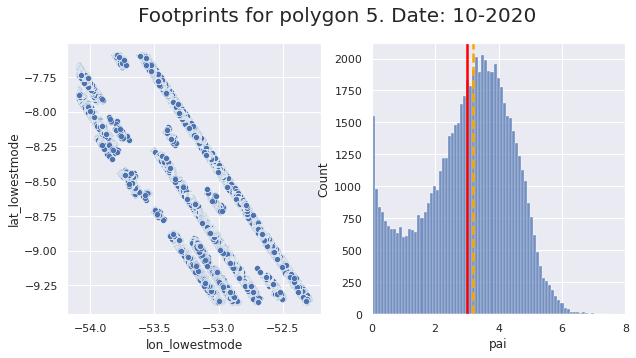

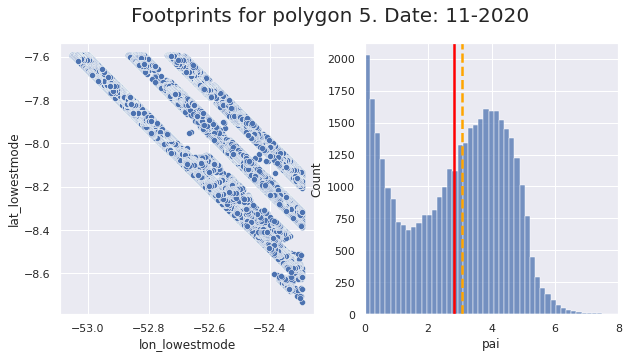

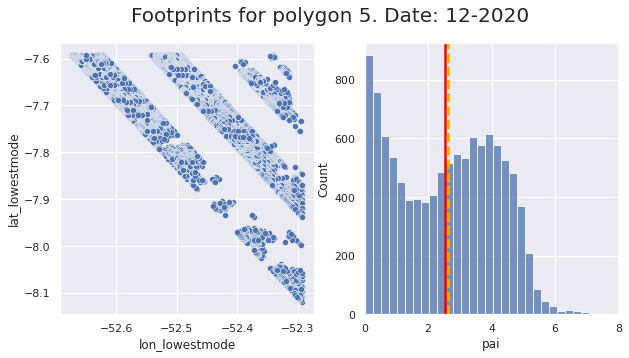

In [10]:
# Plot all months for a given year and a given polygon
year = 2020
for month in range(1, 13):
    plot_one_month_data(footprints, 5, month, year, x_lim_max=8)

## Compare GEDI shots filtered with Land Use filter vs. minimally filtered 

In [11]:
PATH_TO_FILTERED_GEDI = '/maps/drought-with-gedi/gedi_data/gedi_shots_level_2b_land_filtered.csv'
filtered_footprints = pd.read_csv(PATH_TO_FILTERED_GEDI, index_col=0)

In [13]:
filtered_monthly = get_monthly_means_and_shot_count(filtered_footprints, columns=['pai', 'rh100'])

In [14]:
filtered_monthly = interpolate.fill_timeseries_missing_data(filtered_monthly,
                                                            start_date='04-2019', 
                                                            end_date='07-2022', 
                                                            values_to_fill={'number': 0})

In [15]:
filtered_monthly= dfext.add_date_column(filtered_monthly)

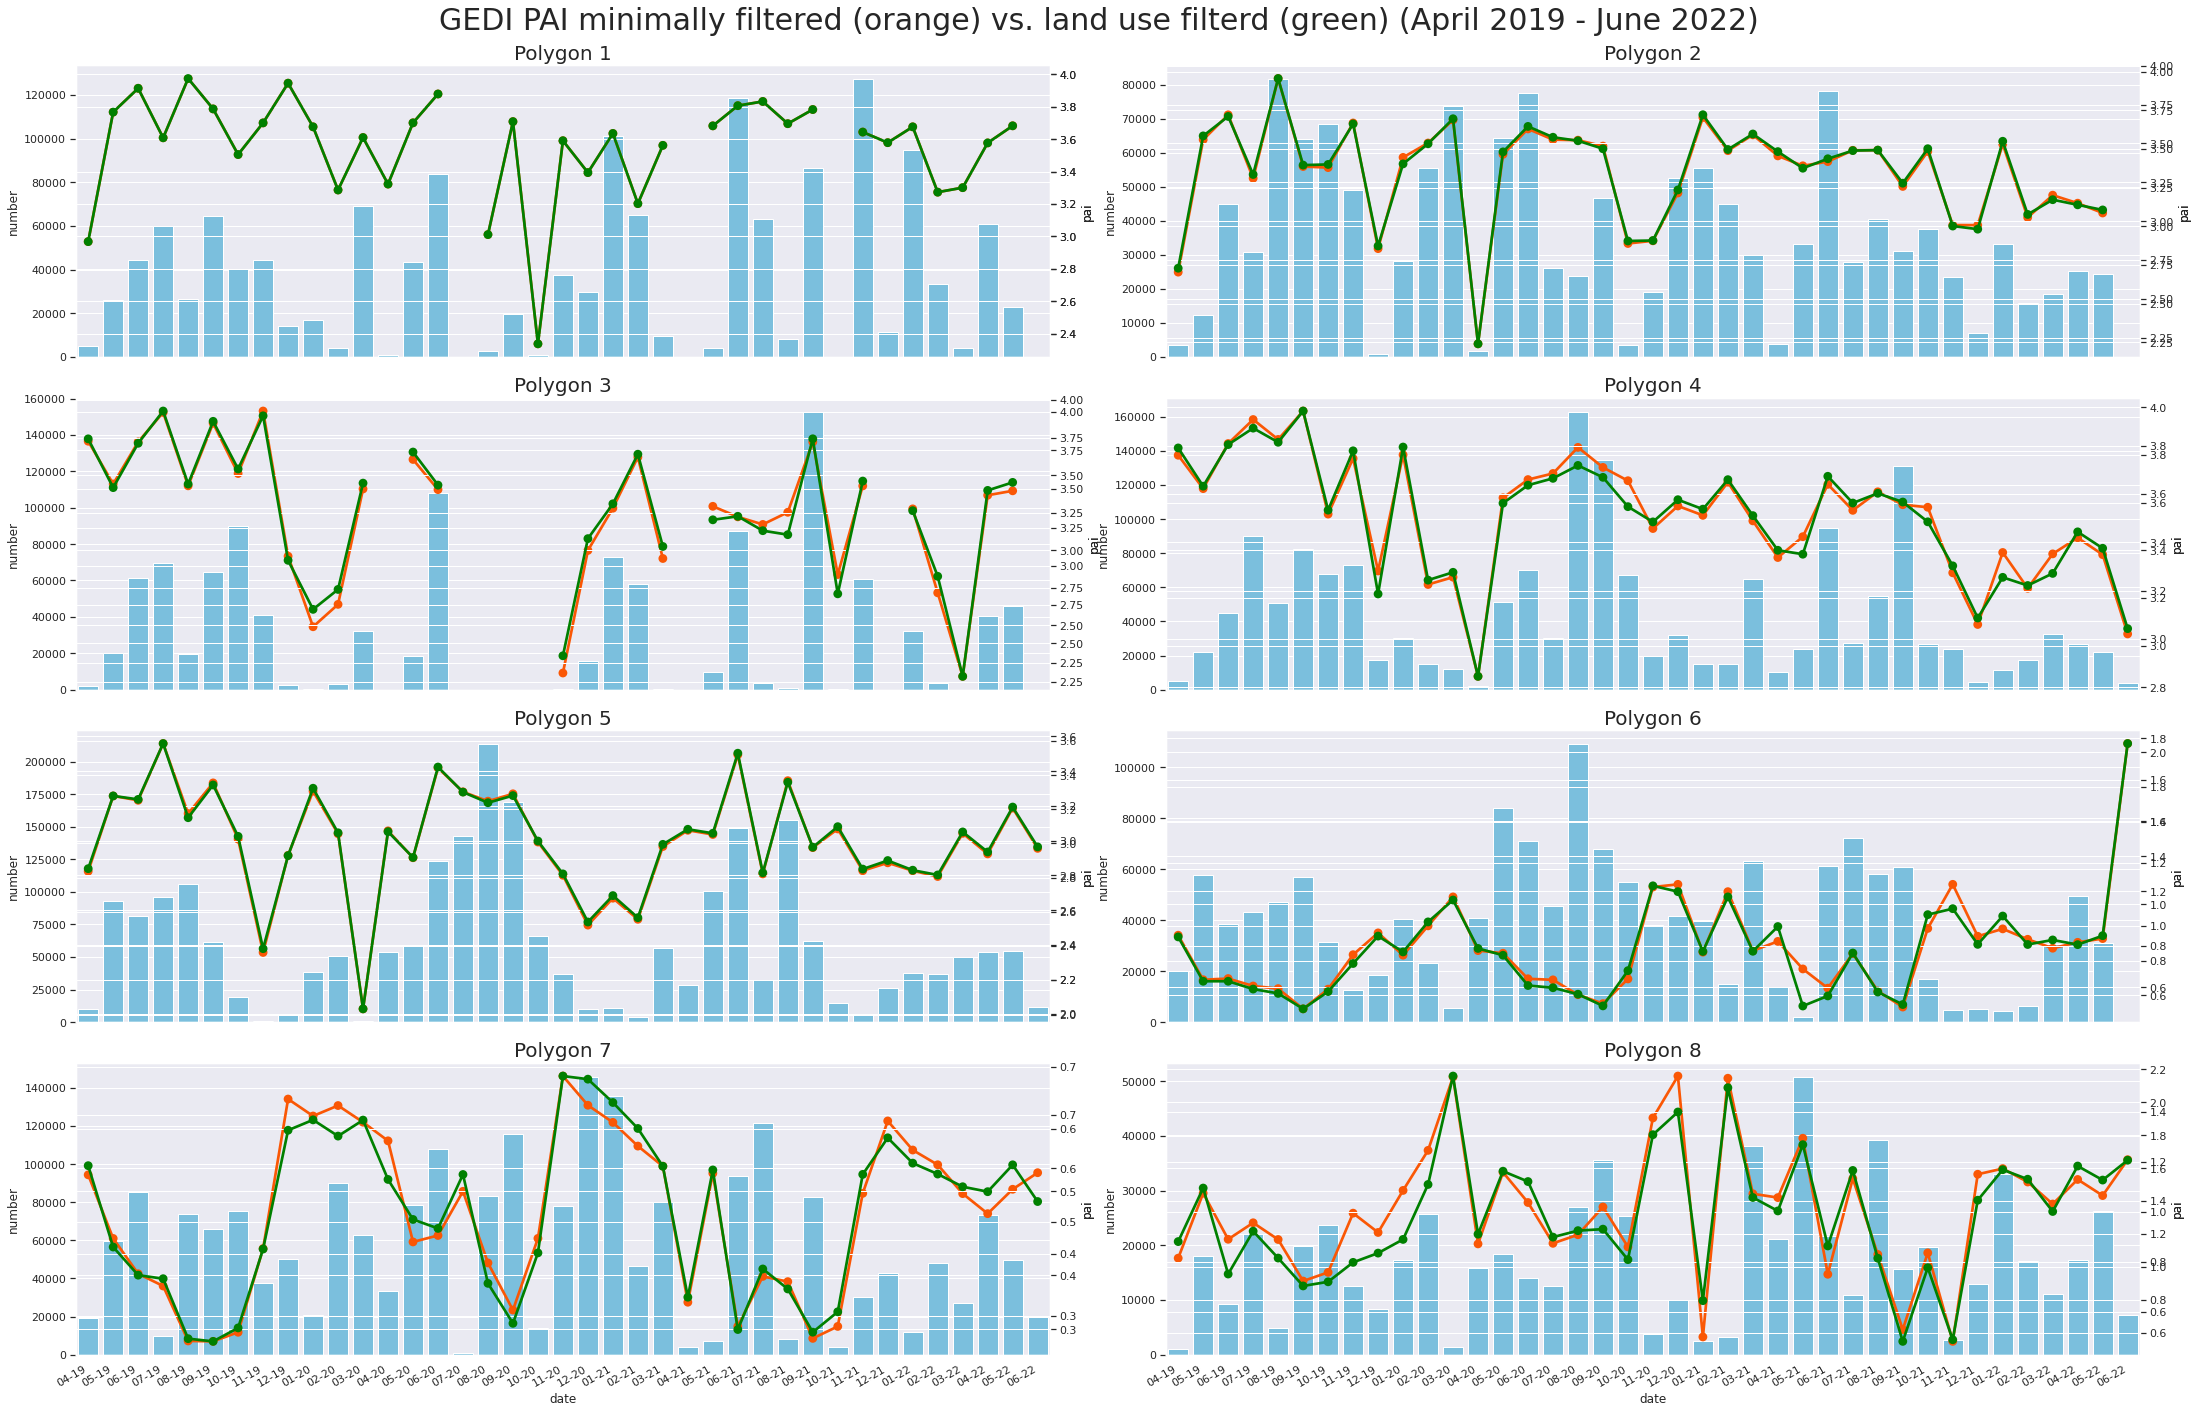

In [16]:
fig, ax = plot.layered_plot_per_polygon(filtered_monthly, 
                                        x='date',
                                        bar_y='number',
                                        line_y='pai',
                                        title="GEDI PAI minimally filtered (orange) vs. land use filterd (green) (April 2019 - June 2022)") # noqa: E501


# Plot PAI on top that wasn't filtered by the land use.
for i in range(8):
    subplot = ax[i // 2, i % 2]

    # Select polygon from the data. Polygon IDs go from 1 to 8.
    polygon_id = i + 1
    polygon_data = monthly[monthly['polygon_id'] == polygon_id]

    # Line plot on top.
    pai_subplot = subplot.twinx()
    sns.pointplot(polygon_data, x='date', y='pai', color='green',
                ax=pai_subplot)
fig.autofmt_xdate()

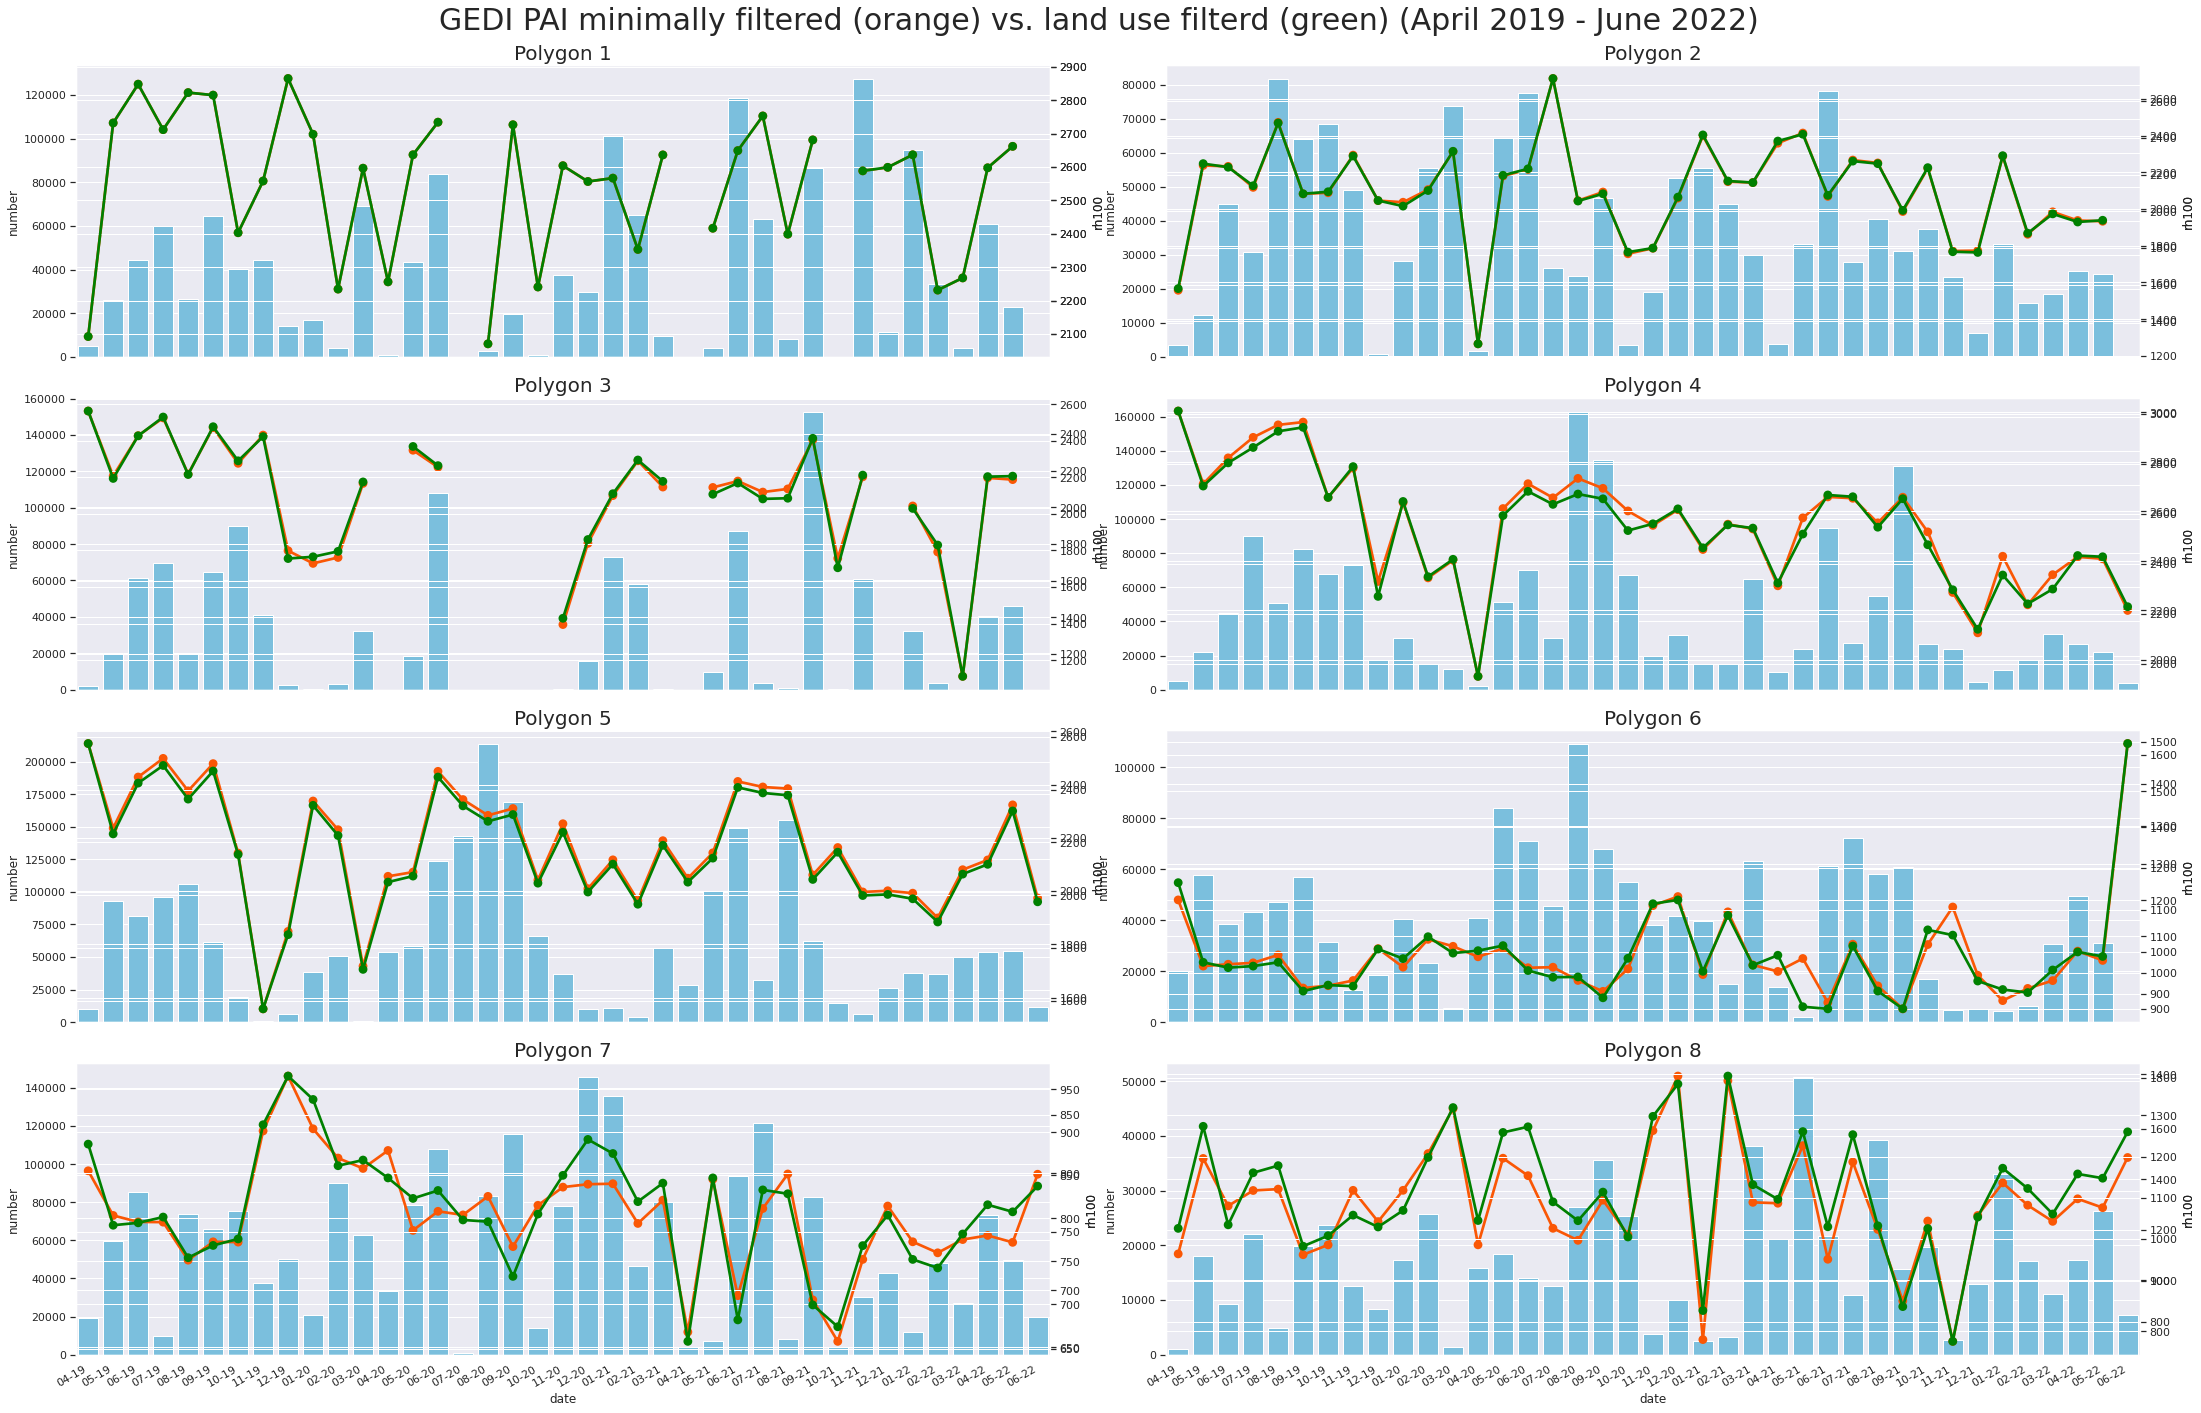

In [17]:
fig, ax = plot.layered_plot_per_polygon(filtered_monthly, 
                                        x='date',
                                        bar_y='number',
                                        line_y='rh100',
                                        title="GEDI PAI minimally filtered (orange) vs. land use filterd (green) (April 2019 - June 2022)") # noqa: E501


# Plot PAI on top that wasn't filtered by the land use.
for i in range(8):
    subplot = ax[i // 2, i % 2]

    # Select polygon from the data. Polygon IDs go from 1 to 8.
    polygon_id = i + 1
    polygon_data = monthly[monthly['polygon_id'] == polygon_id]

    # Line plot on top.
    pai_subplot = subplot.twinx()
    sns.pointplot(polygon_data, x='date', y='rh100', color='green',
                ax=pai_subplot)
fig.autofmt_xdate()